In [81]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 20)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [82]:
df_regression = pd.read_excel("feature-eng-data/regression_dataset.xlsx")
df_regression = df_regression.drop(df_regression.columns[0], axis=1)
df_regression = df_regression.set_index("CompanyNumber")

In [83]:
df_regression

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal,MeanTotalGHG_lv2,MeanCO2_lv2,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10,10.0,9.000000,9.0,9.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,0.160938,0.159688,47.63
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10,9.0,8.000000,6.0,9.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,269.00
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2,1.0,5.000000,2.0,2.0,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180562,0.039,1.6,0.88,1.12,0.17,0.08,2.25,0.044375,0.041875,219927.00
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2,2.0,2.000000,5.0,2.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,1.729687,1.721250,39186.00
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1,2.0,1.000000,2.0,1.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,3.748490,2.203646,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5,5.0,5.000000,2.0,5.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,0.00
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8,5.0,5.000000,6.0,6.0,3310.9,3179.271875,10.5,20.143750,100.806250,0.14375,0.0,0.000000,0.049375,0.047813,1.115719,0.997531,50.637906,8.058969,0.377531,0.090,2.6,1.44,3.47,0.42,0.35,5.69,0.036563,0.034375,2272.20
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7,5.0,5.195021,2.0,6.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,771.00


In [124]:
features = df_regression.iloc[:, :-1]
features_list = features.columns

In [85]:
df_regression

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal,MeanTotalGHG_lv2,MeanCO2_lv2,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10,10.0,9.000000,9.0,9.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,0.160938,0.159688,47.63
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10,9.0,8.000000,6.0,9.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,269.00
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2,1.0,5.000000,2.0,2.0,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180562,0.039,1.6,0.88,1.12,0.17,0.08,2.25,0.044375,0.041875,219927.00
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2,2.0,2.000000,5.0,2.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,1.729687,1.721250,39186.00
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1,2.0,1.000000,2.0,1.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,3.748490,2.203646,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5,5.0,5.000000,2.0,5.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,0.00
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8,5.0,5.000000,6.0,6.0,3310.9,3179.271875,10.5,20.143750,100.806250,0.14375,0.0,0.000000,0.049375,0.047813,1.115719,0.997531,50.637906,8.058969,0.377531,0.090,2.6,1.44,3.47,0.42,0.35,5.69,0.036563,0.034375,2272.20
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7,5.0,5.195021,2.0,6.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,771.00


RF Regressor with 39 features

In [86]:
scaler = MinMaxScaler()
normalised_df_regression = scaler.fit_transform(df_regression)
S1S2CO2e = normalised_df_regression[:, -1]

# drop the label
normalised_df_regression = np.delete(normalised_df_regression, -1, axis=1)

In [87]:
normalised_df_regression.shape

(765, 39)

In [88]:
X = normalised_df_regression
Y = S1S2CO2e

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 765
Number of instances in X_train: 535
Number of instances in X_test: 230
Number of instances in X_train and X_test together: 765


In [89]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(rf_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(rf_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, rf_regressor.predict(X_test))))

Training accuracy: 0.909
Testing accuracy by using score function: 0.416
Testing accuracy by using r2_score meric: 0.416


In [90]:
# perform 10-fold cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.51290298  0.49088421  0.79609608  0.279202    0.38167924 -0.04697046
 -0.04089441  0.602668    0.33390688  0.24764582]
Mean cross-validation score: 0.356


In [91]:
# make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.130


In [92]:
# Define the number of folds for cross-validation
n_folds = 10

# Initialize an empty list to store RMSE scores for each fold
rmse_scores = []
r2_scores = []

# Create the KFold cross-validator
kfold = KFold(n_splits=n_folds, shuffle=False)

# Perform 10-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    
    # Create and train the model
    rf_regressor.fit(X_train, y_train)
    
    # Evaluate the model on the test set and calculate RMSE
    y_pred = rf_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Convert the RMSE scores to a NumPy array for easier calculations
rmse_scores = np.array(rmse_scores)
r2_scores = np.array(r2_scores)

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print('10-Fold Cross-Validation RMSE Scores:')
print(rmse_scores)
print('Mean RMSE: {:.3f}'.format(mean_rmse))
print('Standard Deviation of RMSE: {:.3f}'.format(std_rmse))

print('10-Fold Cross-Validation R2 Scores:')
print(r2_scores)
print('Mean R2: {:.3f}'.format(mean_r2))
print('Standard Deviation of R2: {:.3f}'.format(std_r2))

10-Fold Cross-Validation RMSE Scores:
[0.16449171 0.10369611 0.1410037  0.13359495 0.14853839 0.09521303
 0.03860715 0.07418353 0.07068831 0.05635451]
Mean RMSE: 0.103
Standard Deviation of RMSE: 0.041
10-Fold Cross-Validation R2 Scores:
[ 0.20236855  0.41976258  0.12738942  0.28390616  0.48484664  0.44116123
 -0.64120843  0.55677223  0.36410524  0.81051803]
Mean R2: 0.305
Standard Deviation of R2: 0.364


In [93]:
# summarise feature importance
for i,v in enumerate(rf_regressor.feature_importances_):
    print(f"Feature: {features_list[i]}, Score: {v}")

Feature: AssetsM, Score: 0.2111378726625834
Feature: TurnoverM, Score: 0.1490564605517694
Feature: FTE, Score: 0.17174276061276003
Feature: IR_CO2ePerAssetsM, Score: 0.028607880374532692
Feature: IR_CO2ePerTurnoverM, Score: 0.1613153857722192
Feature: IR_CO2ePerFTE, Score: 0.11798159969933648
Feature: DefraRatio, Score: 0.007651051463958445
Feature: NormalisedIrCO2ePerAssetsM, Score: 0.0
Feature: NormalisedIrCO2ePerTurnoverM, Score: 0.0
Feature: NormalisedIrCO2ePerFTE, Score: 0.0
Feature: ScoreC1a, Score: 0.003472187878414926
Feature: ScoreC1t, Score: 0.0064577428365693934
Feature: ScoreC1f, Score: 0.01610560877060351
Feature: ScoreC2, Score: 0.009600774786397674
Feature: ScoreC1, Score: 0.01297681908349758
Feature: MeanTotalGHG, Score: 0.002998186491665502
Feature: MeanCO2, Score: 0.0010295659677867868
Feature: MeanCH4, Score: 0.00403411068718169
Feature: MeanN2O, Score: 0.004243430180372956
Feature: MeanHFC, Score: 0.01773823874953463
Feature: MeanPFC, Score: 0.008785153069175402
Fea

In [ ]:
values = rf_regressor.feature_importances_
values_list = values.tolist()
len(values_list)

features_list = features_list.tolist()
len(features_list)

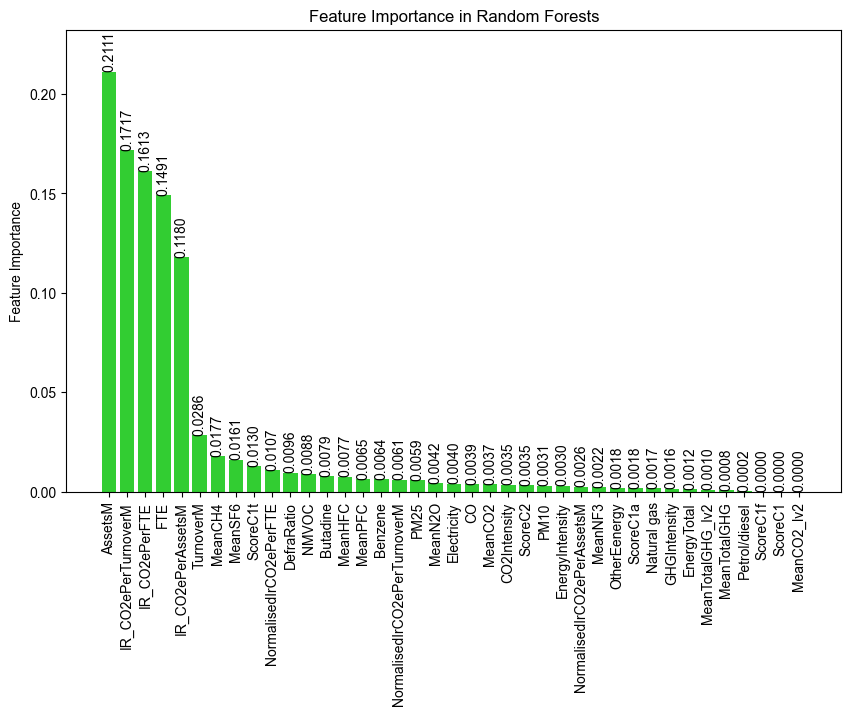

In [97]:
# plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(features_list, values_list, color='#32CD32')
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")

plt.rcParams["font.family"] = "Arial"

# Sort both the features and values based on the values from highest to lowest
sorted_indices = sorted(range(len(values_list)), key=lambda k: values_list[k], reverse=True)
values_list = [values_list[i] for i in sorted_indices]
features_list = [features_list[i] for i in sorted_indices]

plt.ylim(0, max(values_list)*1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             '{:.4f}'.format(height), 
             ha='center', va='bottom', rotation=90)
    
plt.title("Feature Importance in Random Forests")
plt.show()

In [61]:
rf_regressor.n_features_in_

39

Permutation Feature Importance

In [63]:
import time

importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)

Elapsed time to compute the importances: 0.014 seconds


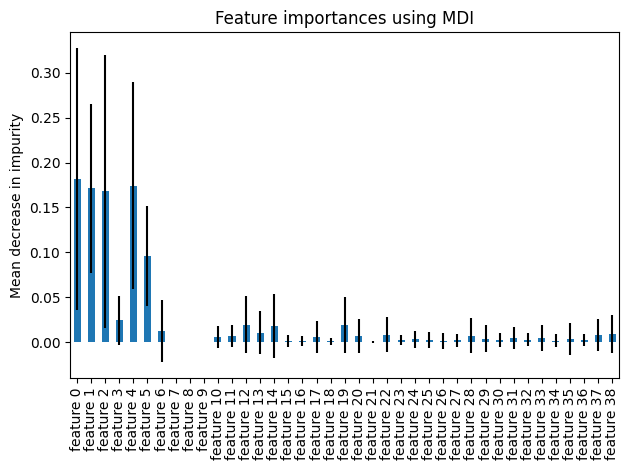

In [65]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

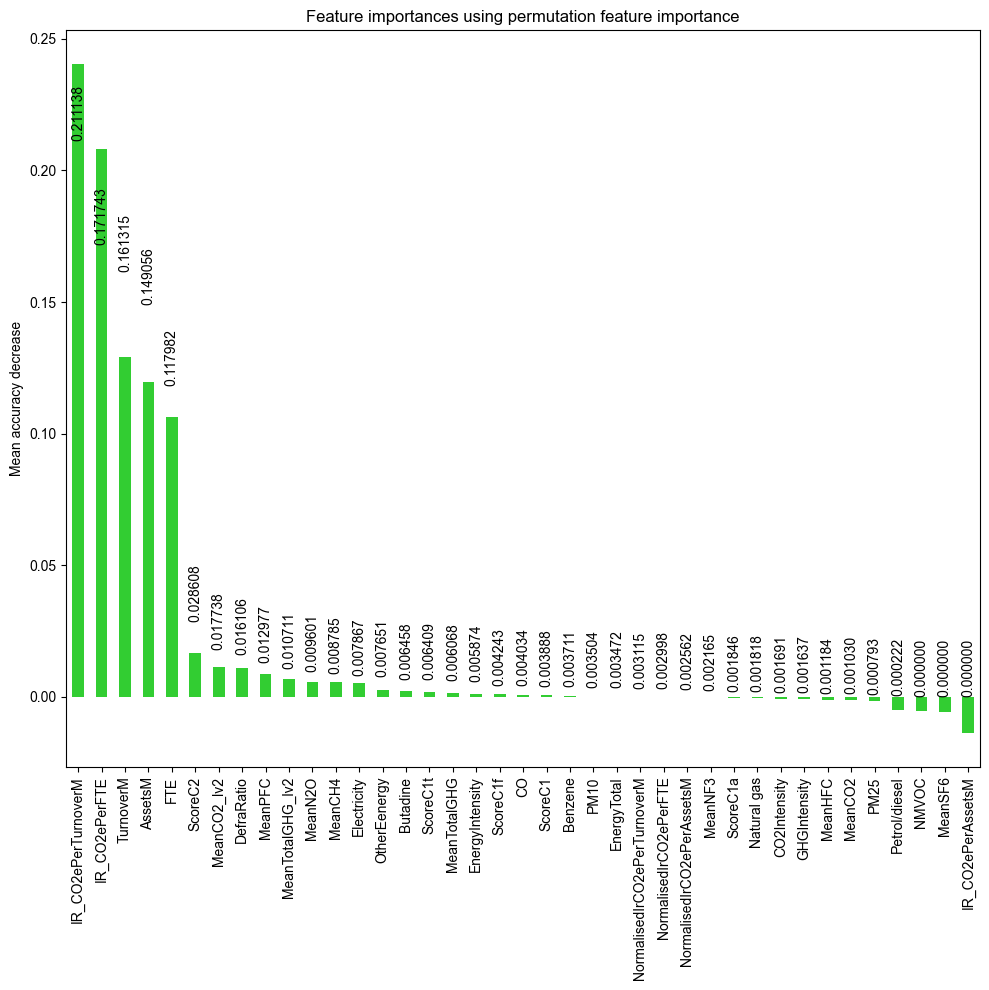

In [140]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_regressor, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

result_mean = result.importances_mean

forest_importances = pd.Series(result.importances_mean, index=features_list)
# Sort the importances from highest to lowest
sorted_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 10))
sorted_importances.plot.bar(ax=ax, color='#32CD32')

    
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             '{:.6f}'.format(height), 
             ha='center', va='bottom', rotation=90)

ax.set_title("Feature importances using permutation feature importance")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


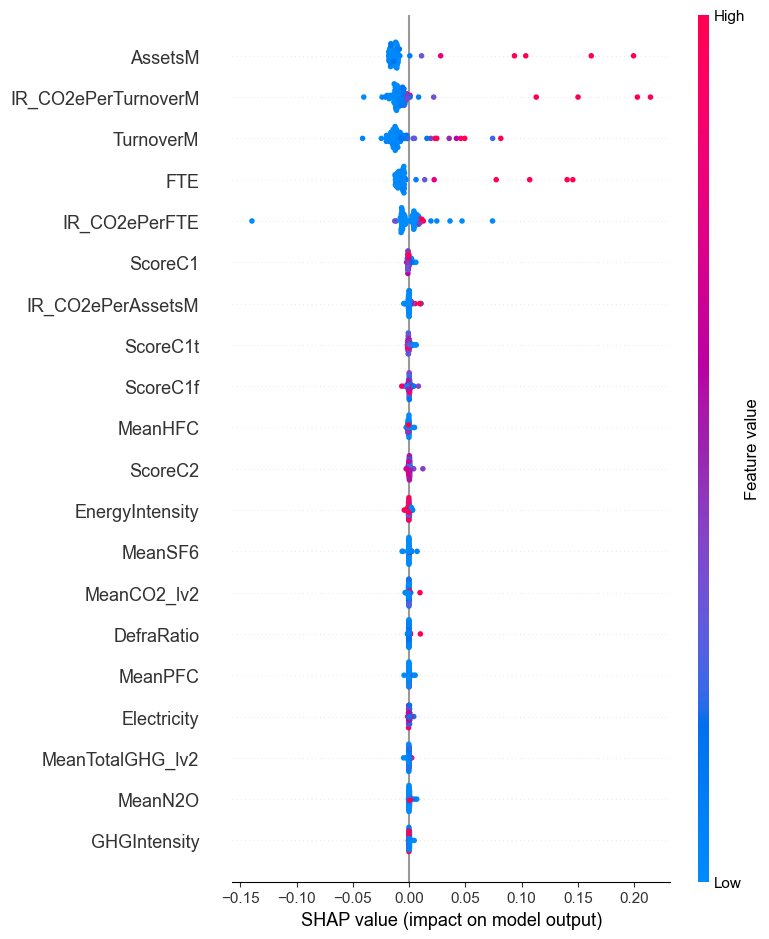

In [139]:
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features_list)

Partial Dependence Plot

Computing partial dependence plots...


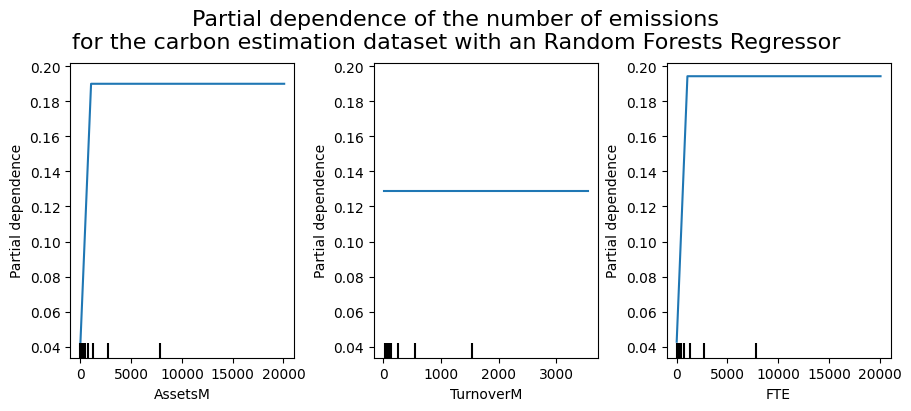

In [85]:
from sklearn.inspection import PartialDependenceDisplay

features = df_regression.drop(columns="S1S2CO2e")

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": ["AssetsM", "TurnoverM", "FTE"],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    #"categorical_features": categorical_features,
}

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 4), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    rf_regressor,
    features,
    **features_info,
    ax=ax,
    **common_params,
)

fig = display.figure_.suptitle(
    (
        "Partial dependence of the number of emissions\n"
        "for the carbon estimation dataset with an Random Forests Regressor"
    ),
    fontsize=16,
)

In [ ]:
pip install shap

In [108]:
explainer = shap.Explainer(rf_regressor)
shap_values = explainer.shap_values(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


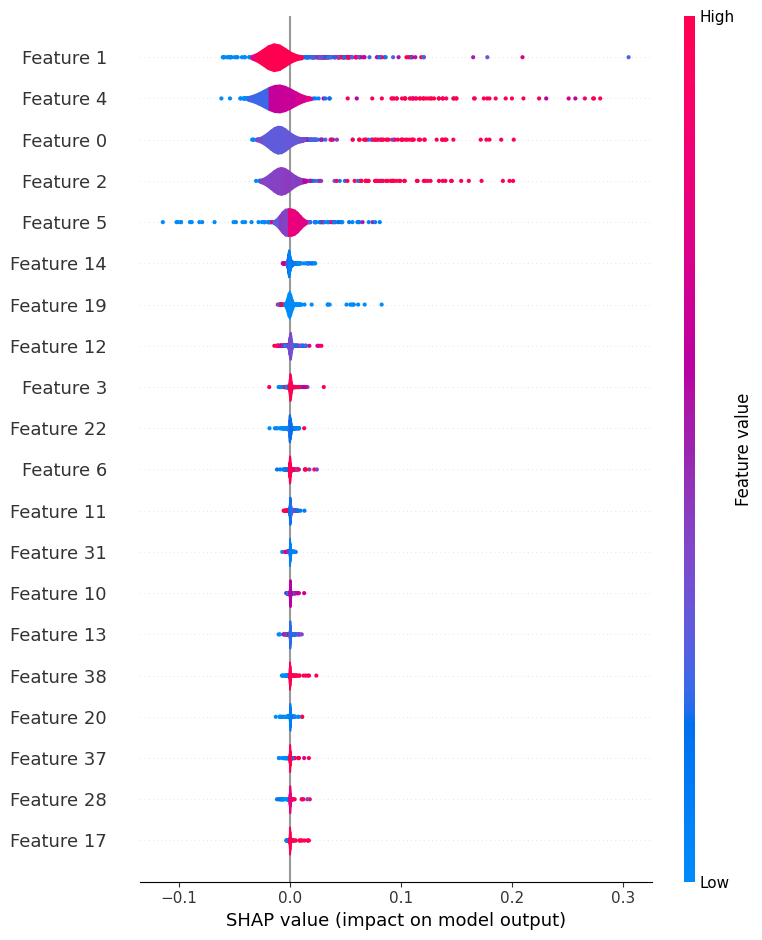

In [109]:
shap.summary_plot(shap_values, X, plot_type='violin')

Random Forests Regressor without level2 features (37 features)

In [164]:
df_regression.head()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal,MeanTotalGHG_lv2,MeanCO2_lv2,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.3,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10,10.0,9.0,9.0,9.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,0.160938,0.159688,47.63
00024869,1048.0,486.0,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10,9.0,8.0,6.0,9.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.000000,0.000000,269.00
00029559,76060.0,291.2,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2,1.0,5.0,2.0,2.0,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180562,0.039,1.6,0.88,1.12,0.17,0.08,2.25,0.044375,0.041875,219927.00
00030226,584.0,104.6,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2,2.0,2.0,5.0,2.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,1.729687,1.721250,39186.00
00033774,4017.0,15700.0,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1,2.0,1.0,2.0,1.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,3.748490,2.203646,431311.00


In [20]:
df_regression_2 = df_regression.drop(columns=["MeanCO2_lv2", "MeanTotalGHG_lv2"])

In [21]:
df_regression_2

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10,10.0,9.000000,9.0,9.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,47.63
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10,9.0,8.000000,6.0,9.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,269.00
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2,1.0,5.000000,2.0,2.0,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180562,0.039,1.6,0.88,1.12,0.17,0.08,2.25,219927.00
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2,2.0,2.000000,5.0,2.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,39186.00
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1,2.0,1.000000,2.0,1.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5,5.0,5.000000,2.0,5.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.00
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8,5.0,5.000000,6.0,6.0,3310.9,3179.271875,10.5,20.143750,100.806250,0.14375,0.0,0.000000,0.049375,0.047813,1.115719,0.997531,50.637906,8.058969,0.377531,0.090,2.6,1.44,3.47,0.42,0.35,5.69,2272.20
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7,5.0,5.195021,2.0,6.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,771.00


In [22]:
scaler = MinMaxScaler()
normalised_df_regression = scaler.fit_transform(df_regression_2)
S1S2CO2e = normalised_df_regression[:, -1]

# drop the label
normalised_df_regression = np.delete(normalised_df_regression, -1, axis=1)

In [23]:
X = normalised_df_regression
Y = S1S2CO2e

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 765
Number of instances in X_train: 535
Number of instances in X_test: 230
Number of instances in X_train and X_test together: 765


In [25]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(rf_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(rf_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, rf_regressor.predict(X_test))))

Training accuracy: 0.902
Testing accuracy by using score function: 0.420
Testing accuracy by using r2_score meric: 0.420


In [26]:
# perform 10-fold cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.51576104  0.54019592  0.71804648  0.2527926   0.32393569  0.08537008
 -0.14305531  0.44972491  0.32331554  0.20608282]
Mean cross-validation score: 0.327


In [27]:
# Define the number of folds for cross-validation
n_folds = 10

# Initialize an empty list to store RMSE scores for each fold
rmse_scores = []
r2_scores = []

# Create the KFold cross-validator
kfold = KFold(n_splits=n_folds, shuffle=False)

# Perform 10-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    
    # Create and train the model
    rf_regressor.fit(X_train, y_train)
    
    # Evaluate the model on the test set and calculate RMSE
    y_pred = rf_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Convert the RMSE scores to a NumPy array for easier calculations
rmse_scores = np.array(rmse_scores)
r2_scores = np.array(r2_scores)

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print('10-Fold Cross-Validation RMSE Scores:')
print(rmse_scores)
print('Mean RMSE: {:.3f}'.format(mean_rmse))
print('Standard Deviation of RMSE: {:.3f}'.format(std_rmse))

print('10-Fold Cross-Validation R2 Scores:')
print(r2_scores)
print('Mean R2: {:.3f}'.format(mean_r2))
print('Standard Deviation of R2: {:.3f}'.format(std_r2))

10-Fold Cross-Validation RMSE Scores:
[0.16344135 0.09475319 0.14430065 0.12708664 0.14573427 0.09967785
 0.03719177 0.07177469 0.06881397 0.06052415]
Mean RMSE: 0.101
Standard Deviation of RMSE: 0.040
10-Fold Cross-Validation R2 Scores:
[ 0.21252257  0.51552818  0.08610551  0.35197819  0.50411327  0.38752114
 -0.52307733  0.58508939  0.39738029  0.78144139]
Mean R2: 0.330
Standard Deviation of R2: 0.338


In [28]:
# make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.061


In [29]:
features_list = df_regression_2.columns

Feature: AssetsM, Score: 0.15598949815377522
Feature: TurnoverM, Score: 0.1723743262031147
Feature: FTE, Score: 0.2037391424160295
Feature: IR_CO2ePerAssetsM, Score: 0.024108302936043817
Feature: IR_CO2ePerTurnoverM, Score: 0.15765004537586488
Feature: IR_CO2ePerFTE, Score: 0.09969662460131194
Feature: DefraRatio, Score: 0.016692032990432093
Feature: NormalisedIrCO2ePerAssetsM, Score: 0.0
Feature: NormalisedIrCO2ePerTurnoverM, Score: 0.0
Feature: NormalisedIrCO2ePerFTE, Score: 0.0
Feature: ScoreC1a, Score: 0.0034220073518679527
Feature: ScoreC1t, Score: 0.008024318711778484
Feature: ScoreC1f, Score: 0.01967290025677969
Feature: ScoreC2, Score: 0.010564719078424602
Feature: ScoreC1, Score: 0.009503042639462299
Feature: MeanTotalGHG, Score: 0.0018811013008429142
Feature: MeanCO2, Score: 0.003606173305915083
Feature: MeanCH4, Score: 0.006253250560439647
Feature: MeanN2O, Score: 0.0019819555613543737
Feature: MeanHFC, Score: 0.021290688915407262
Feature: MeanPFC, Score: 0.00850234289023046

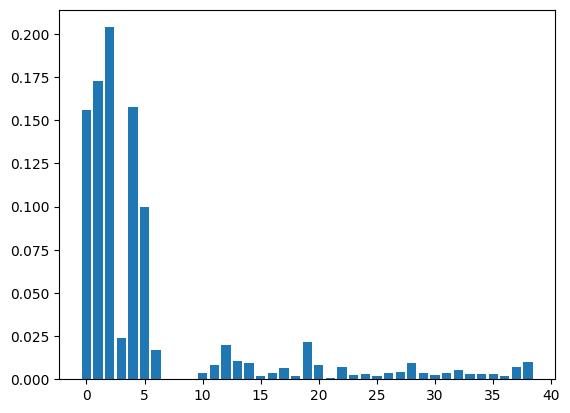

In [43]:
# summarise feature importance
for i,v in enumerate(rf_regressor.feature_importances_):
    print(f"Feature: {features_list[i]}, Score: {v}")

# plot feature importance
plt.bar([x for x in range(len(rf_regressor.feature_importances_))], rf_regressor.feature_importances_)

plt.show()

In [44]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_combined = np.concatenate((y_pred_train, y_pred), axis=0)
y_pred_combined.shape

(765,)

In [180]:
y_pred_combined_2d = y_pred_combined.reshape(-1, 1)
y_pred_combined_2d.shape

(765, 1)

In [181]:
# Append y_pred to the normalised_score_table
combined_table = np.hstack((normalised_df_regression, y_pred_combined_2d))

# Inverse transform the combined table
inverse_transformed_table = scaler.inverse_transform(combined_table)

# Extract the inverse transformed y_pred
inverse_transformed_y_pred = inverse_transformed_table[:, -1]

In [182]:
inverse_transformed_y_pred_series = pd.Series(inverse_transformed_y_pred)
inverse_transformed_y_pred_series.describe()

count       765.000000
mean      21217.818332
std       47245.994687
min           2.424707
25%         371.834068
50%        2032.480420
75%       14737.715900
max      344696.190170
dtype: float64

In [189]:
X = normalised_df_regression
Y = S1S2CO2e

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 765
Number of instances in X_train: 535
Number of instances in X_test: 230
Number of instances in X_train and X_test together: 765


In [190]:
X_train.shape

(535, 37)